In [119]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt


In [120]:
df=pd.read_csv('/content/drive/MyDrive/machine_learning_course_proj/cdc/cdc.csv')
df

year  month  day gender  births
0      1969      1  1.0      F    4046
1      1969      1  1.0      M    4440
2      1969      1  2.0      F    4454
3      1969      1  2.0      M    4548
4      1969      1  3.0      F    4548
...     ...    ...  ...    ...     ...
15542  2008     10  NaN      M  183219
15543  2008     11  NaN      F  158939
15544  2008     11  NaN      M  165468
15545  2008     12  NaN      F  173215
15546  2008     12  NaN      M  181235

[15547 rows x 5 columns]

In [121]:
df['year'].unique()

array([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008])

In [122]:
df.describe()

year         month           day         births
count  15547.000000  15547.000000  15067.000000   15547.000000
mean    1979.037435      6.515919     17.769894    9762.293561
std        6.728340      3.449632     15.284034   28552.465810
min     1969.000000      1.000000      1.000000       1.000000
25%     1974.000000      4.000000      8.000000    4358.000000
50%     1979.000000      7.000000     16.000000    4814.000000
75%     1984.000000     10.000000     24.000000    5289.500000
max     2008.000000     12.000000     99.000000  199622.000000

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [124]:
# df['day'].value_counts(dropna=False).sort_index()

df.isna().sum()
df.fillna(0,inplace=True)

In [125]:
df.isna().sum()

year      0
month     0
day       0
gender    0
births    0
dtype: int64

In [126]:
# removing day values greater than 99
births=df[df['day']!=99].copy()

In [127]:
births['births'].describe()

count     15197.000000
mean       9986.706258
std       28840.649834
min           1.000000
25%        4388.000000
50%        4837.000000
75%        5300.000000
max      199622.000000
Name: births, dtype: float64

In [128]:
df['month']

0         1
1         1
2         1
3         1
4         1
         ..
15542    10
15543    11
15544    11
15545    12
15546    12
Name: month, Length: 15547, dtype: int64

In [129]:
q1=4388
q3=5300
iqr=q3-q1
iqr

912

In [130]:
lower=q1 - 1.5*iqr
upper=q3+1.5*iqr

In [131]:
births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15197 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15197 non-null  int64  
 1   month   15197 non-null  int64  
 2   day     15197 non-null  float64
 3   gender  15197 non-null  object 
 4   births  15197 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 712.4+ KB


In [132]:
#  births1= births[(births['births']>=lower) &(births['births']<=upper)]

In [133]:
final=births[births['births'].between(lower,upper)].copy()

In [134]:
final.describe()

year         month           day        births
count  14610.000000  14610.000000  14610.000000  14610.000000
mean    1978.501027      6.522930     15.729637   4824.470089
std        5.766538      3.448821      8.800393    579.996983
min     1969.000000      1.000000      1.000000   3249.000000
25%     1974.000000      4.000000      8.000000   4383.000000
50%     1979.000000      7.000000     16.000000   4812.000000
75%     1984.000000     10.000000     23.000000   5259.000000
max     1988.000000     12.000000     31.000000   6527.000000

In [135]:
final['year'].unique()

array([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988])

Creating Decade column

In [136]:
final['decade']=(final['year']//10)*10
final

year  month   day gender  births  decade
0      1969      1   1.0      F    4046    1960
1      1969      1   1.0      M    4440    1960
2      1969      1   2.0      F    4454    1960
3      1969      1   2.0      M    4548    1960
4      1969      1   3.0      F    4548    1960
...     ...    ...   ...    ...     ...     ...
15062  1988     12  29.0      M    5944    1980
15063  1988     12  30.0      F    5742    1980
15064  1988     12  30.0      M    6095    1980
15065  1988     12  31.0      F    4435    1980
15066  1988     12  31.0      M    4698    1980

[14610 rows x 6 columns]

In [137]:
decade1=final.pivot_table(index='decade',values='births',aggfunc=sum)
decade1

births
decade          
1960     3598578
1970    33379133
1980    33507797

#Pivot tables

### pivote table to show number of males and females birth in each decade

In [138]:
decades=final.pivot_table(index='decade',values='births',aggfunc=sum,columns='gender')
decades

gender         F         M
decade                    
1960     1752836   1845742
1970    16260348  17118785
1980    16336507  17171290

In [139]:
# fig1=px.bar(data_frame=decades,x=decades.index,
#     y=decades.values())
# fig1.show()

In [185]:
data = [go.Bar(
    x=decades.index,
    y=decades.values.flatten(),
    
)]

layout = go.Layout(title='Number of births in decades',plot_bgcolor='#888d94',paper_bgcolor='#888d94')
fig = go.Figure(data=data, layout=layout )
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_yaxes(showgrid=False, zeroline=False)
fig.show()

pivote table of births 


In [141]:
decades2=final.pivot_table(index='decade',values='births',aggfunc=[sum,min,max,'mean'],columns='gender')
decades2

sum             min         max               mean             
gender         F         M     F     M     F     M            F            M
decade                                                                      
1960     1752836   1845742  3760  4106  5988  6244  4802.290411  5056.827397
1970    16260348  17118785  3249  3402  6204  6480  4452.450164  4687.509584
1980    16336507  17171290  3697  3897  6332  6527  4968.524027  5222.411800

In [142]:

# fig = px.line(decade1, x=decade1.index,y=decade1.values, title='Line chart to show birth in each decade')
# fig.show()


line_chrt=final.groupby(['year','decade'])['births'].sum().reset_index()
fig = px.line(line_chrt, x='year',y='births', title='Line chart to show birth in each Year',color_discrete_sequence=px.colors.sequential.Plasma)
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_traces(marker_color='#5961d4', marker_line_color='#ac11ba',
                  marker_line_width=3)
fig.update_layout(paper_bgcolor='#d9d7ca',plot_bgcolor='#d9d7ca')
fig.update_yaxes(showgrid=False, zeroline=False)
fig.update_xaxes(

    ticks="outside",
    tickson="boundaries",
    ticklen=40
)
fig.update_layout(
            xaxis=dict(
     
            )
        )
fig.show()

In [143]:
final

year  month   day gender  births  decade
0      1969      1   1.0      F    4046    1960
1      1969      1   1.0      M    4440    1960
2      1969      1   2.0      F    4454    1960
3      1969      1   2.0      M    4548    1960
4      1969      1   3.0      F    4548    1960
...     ...    ...   ...    ...     ...     ...
15062  1988     12  29.0      M    5944    1980
15063  1988     12  30.0      F    5742    1980
15064  1988     12  30.0      M    6095    1980
15065  1988     12  31.0      F    4435    1980
15066  1988     12  31.0      M    4698    1980

[14610 rows x 6 columns]

In [144]:
final['day']=final['day'].astype(int)
final

year  month  day gender  births  decade
0      1969      1    1      F    4046    1960
1      1969      1    1      M    4440    1960
2      1969      1    2      F    4454    1960
3      1969      1    2      M    4548    1960
4      1969      1    3      F    4548    1960
...     ...    ...  ...    ...     ...     ...
15062  1988     12   29      M    5944    1980
15063  1988     12   30      F    5742    1980
15064  1988     12   30      M    6095    1980
15065  1988     12   31      F    4435    1980
15066  1988     12   31      M    4698    1980

[14610 rows x 6 columns]

In [145]:
year=final['year']*10000
month=final['month']*100
day=final['day']
date=year+month+day

In [146]:
date=pd.to_datetime(date,format='%Y%m%d')

# final['date']=pd.to_datetime(date,format='%Y%m%d')


In [147]:
final.columns

Index(['year', 'month', 'day', 'gender', 'births', 'decade'], dtype='object')

In [148]:
final=final.set_index(date)
final

year  month  day gender  births  decade
1969-01-01  1969      1    1      F    4046    1960
1969-01-01  1969      1    1      M    4440    1960
1969-01-02  1969      1    2      F    4454    1960
1969-01-02  1969      1    2      M    4548    1960
1969-01-03  1969      1    3      F    4548    1960
...          ...    ...  ...    ...     ...     ...
1988-12-29  1988     12   29      M    5944    1980
1988-12-30  1988     12   30      F    5742    1980
1988-12-30  1988     12   30      M    6095    1980
1988-12-31  1988     12   31      F    4435    1980
1988-12-31  1988     12   31      M    4698    1980

[14610 rows x 6 columns]

In [149]:
final.index.dayofweek

Int64Index([2, 2, 3, 3, 4, 4, 5, 5, 6, 6,
            ...
            1, 1, 2, 2, 3, 3, 4, 4, 5, 5],
           dtype='int64', length=14610)

In [150]:
final['month_of_year']=final.index.strftime('%B')

In [151]:
final['dayofweek']=final.index.strftime('%A')

In [152]:
final

year  month  day gender  births  decade month_of_year  dayofweek
1969-01-01  1969      1    1      F    4046    1960       January  Wednesday
1969-01-01  1969      1    1      M    4440    1960       January  Wednesday
1969-01-02  1969      1    2      F    4454    1960       January   Thursday
1969-01-02  1969      1    2      M    4548    1960       January   Thursday
1969-01-03  1969      1    3      F    4548    1960       January     Friday
...          ...    ...  ...    ...     ...     ...           ...        ...
1988-12-29  1988     12   29      M    5944    1980      December   Thursday
1988-12-30  1988     12   30      F    5742    1980      December     Friday
1988-12-30  1988     12   30      M    6095    1980      December     Friday
1988-12-31  1988     12   31      F    4435    1980      December   Saturday
1988-12-31  1988     12   31      M    4698    1980      December   Saturday

[14610 rows x 8 columns]

Number of births in each day

In [153]:
final.groupby(['dayofweek'])['births'].sum().reset_index()

dayofweek    births
0     Friday  10593230
1     Monday  10371795
2   Saturday   9091504
3     Sunday   8646988
4   Thursday  10434806
5    Tuesday  10813799
6  Wednesday  10533386

mean births in each day of every decade

> Indented block



In [154]:

dfb=final.pivot_table(values='births',index='dayofweek',columns='decade',aggfunc='sum')
dfb.sort_index(ascending=True)

decade       1960     1970     1980
dayofweek                          
Friday     531220  4992508  5069502
Monday     526638  4895418  4949739
Saturday   483710  4392927  4214867
Sunday     451604  4154367  4041017
Thursday   517742  4903588  5013476
Tuesday    549754  5090433  5173612
Wednesday  537910  4949892  5045584

In [155]:
#Ordering days index

# pivot_dayofweek=pivot_dayofweek.loc[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']] #fancy indexing
# pivot_dayofweek

In [156]:
fig=px.bar(
    dfb.stack().reset_index().assign(decade=lambda d: d["decade"].astype(str)),
    color="decade",
    x="dayofweek",
    y=0,
    barmode="group",
)
fig.update_layout(title="No of birth in day in every decade", yaxis={"title":"Births"})
fig.show()

In [160]:
# px.bar(pivot_dayofweek,x=pivot_dayofweek.index,y=pivot_dayofweek.values,barmode='group')


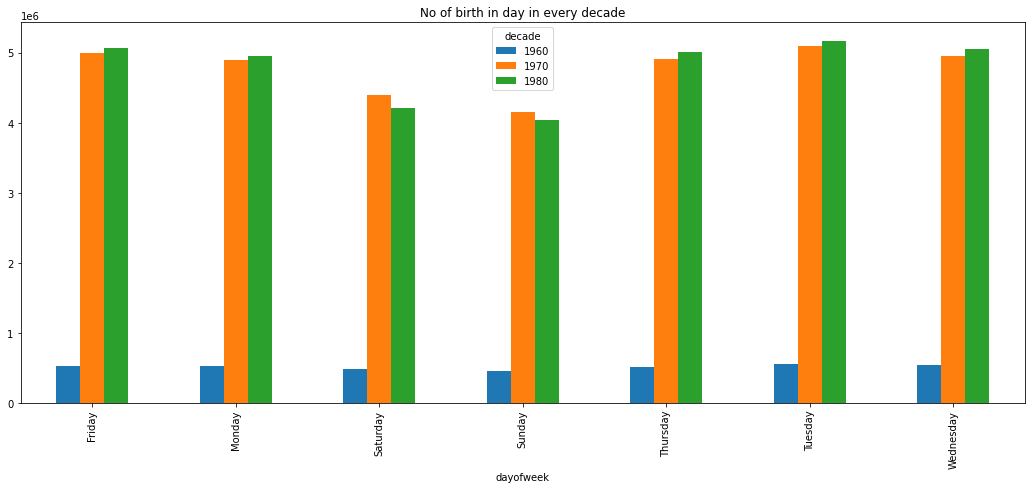

In [161]:
pivot_dayofweek.plot(kind='bar',figsize=(18,7),title='No of birth in day in every decade')

In [170]:
line_df=dfb.stack().reset_index().assign(decade=lambda d: d["decade"].astype(str))
line_df.head(3)

dayofweek decade        0
0    Friday   1960   531220
1    Friday   1970  4992508
2    Friday   1980  5069502

In [174]:
line_df1=line_df.groupby(['dayofweek'])[0].sum().reset_index()

In [175]:
# pivot_dayofweek.plot(kind='line',figsize=(18,7),title='No of birth in day(grouped) in every decade')
px.line(line_df1,
       x='dayofweek',y=0
    )

table to show the mean births value in each day of every month




In [186]:
c=final.pivot_table(index=[final.index.month,final.index.day],values='births')
c

births
1  1   4009.225
   2   4247.400
   3   4500.900
   4   4571.350
   5   4603.625
...         ...
12 27  4850.150
   28  5044.200
   29  5120.150
   30  5172.350
   31  4859.200

[366 rows x 1 columns]

In [177]:
el=[]
for month,day in c.index:
  d=pd.datetime(2020,month,day)
  el.append(d)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



In [188]:
len(el)

366

In [189]:
c.index=el

In [191]:
fig=px.line(c,x=c.index,y=c.values ,title='Births weekly',hover_data=['births'],
            color_discrete_sequence=px.colors.sequential.Rainbow)
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_traces(marker_color='#5961d4', marker_line_color='#ac11ba',mode="lines",
                  marker_line_width=3)
fig.update_layout(paper_bgcolor='#d9d7ca',plot_bgcolor='#d9d7ca',hovermode='x')
fig.update_yaxes(showgrid=False, zeroline=False)
fig.update_xaxes(

    ticks="outside",
    tickson="boundaries",
    ticklen=40
)
fig.update_layout(
    
    hoverlabel=dict(
    
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    )
)
     
fig.show()